In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load specific sheet from Excel file
file_path = 'E Commerce Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='E Comm')

# Check first few rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Missing value handling

In [4]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df = df.dropna(subset=[
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
])


In [7]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Generate basic descriptive statistics and transpose
df_summary = numeric_df.describe().transpose()

# Calculate additional metrics
df_summary["Range"] = df_summary["max"] - df_summary["min"]                  # Range
df_summary["Mode"] = numeric_df.mode().iloc[0]                               # Mode (first mode value)
df_summary["Skewness"] = numeric_df.skew()                                   # Skewness
df_summary["Kurtosis"] = numeric_df.kurt()                                   # Kurtosis

# Display a message for the dataset summary
print("\n📊 Summary of Numeric Columns in the Dataset:\n")

# Show selected statistical metrics
df_summary[["min", "max", "Range", "Mode", "mean", "std", "Skewness", "Kurtosis"]]



📊 Summary of Numeric Columns in the Dataset:



,min,max,Range,Mode,mean,std,Skewness,Kurtosis
CustomerID,50001.0,55630.00,5629.00,50001.00,53017.994966,1608.979289,-0.179030,-1.139614
Churn,0.0,1.00,1.00,0.00,0.167197,0.373201,1.784454,1.184905
Tenure,0.0,51.00,51.00,1.00,8.776895,7.678508,0.937441,0.499508
CityTier,1.0,3.00,2.00,1.00,1.707737,0.936725,0.611045,-1.580864
WarehouseToHome,5.0,127.00,122.00,9.00,15.743773,8.594330,1.892966,13.899026
HourSpendOnApp,0.0,5.00,5.00,3.00,2.981187,0.722158,-0.081623,-0.694891
NumberOfDeviceRegistered,1.0,6.00,5.00,4.00,3.754107,1.025233,-0.407113,0.558112
SatisfactionScore,1.0,5.00,4.00,3.00,3.056439,1.389730,-0.127004,-1.146770
NumberOfAddress,1.0,22.00,21.00,3.00,4.216481,2.562142,1.168565,1.335884
Complain,0.0,1.00,1.00,0.00,0.282194,0.450127,0.968267,-1.063022


## EDA

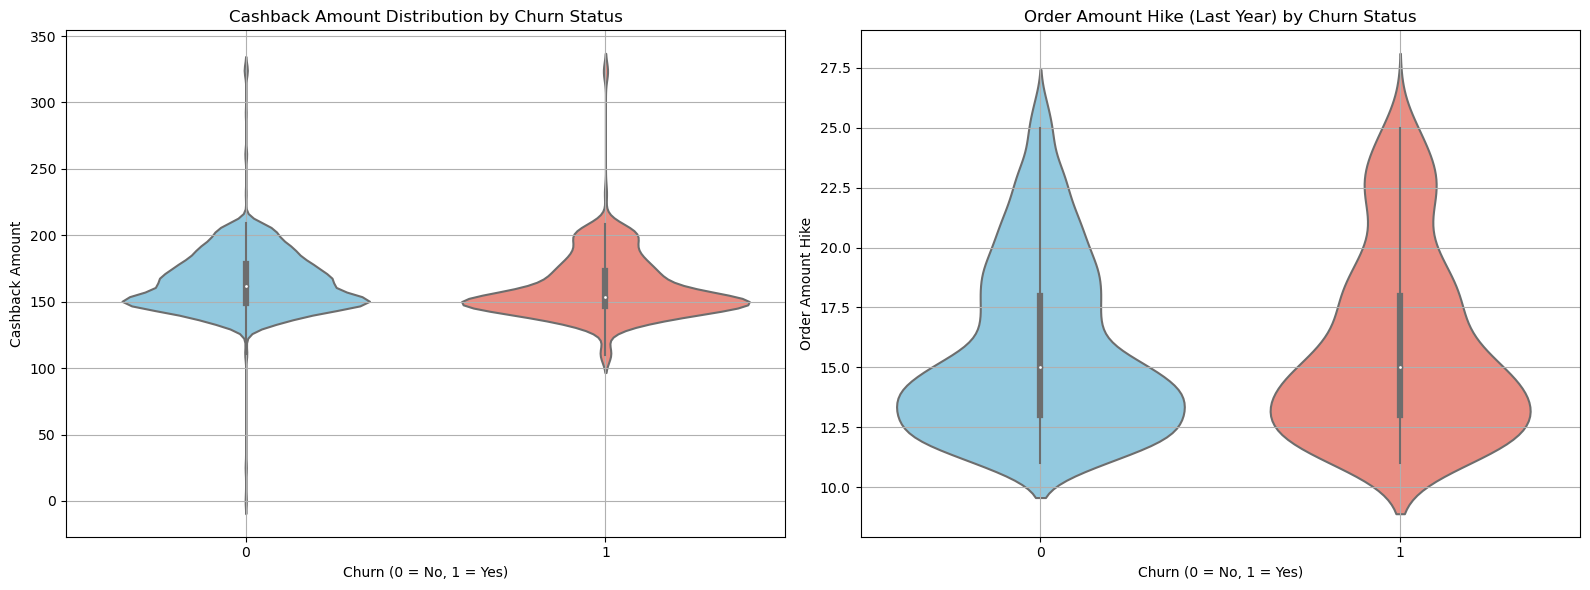

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# First violin plot - CashbackAmount
sns.violinplot(data=df, x='Churn', y='CashbackAmount', palette={0: 'skyblue', 1: 'salmon'}, ax=axes[0])
axes[0].set_title('Cashback Amount Distribution by Churn Status')
axes[0].set_xlabel('Churn (0 = No, 1 = Yes)')
axes[0].set_ylabel('Cashback Amount')
axes[0].grid(True)

# Second violin plot - OrderAmountHikeFromlastYear
sns.violinplot(data=df, x='Churn', y='OrderAmountHikeFromlastYear', palette={0: 'skyblue', 1: 'salmon'}, ax=axes[1])
axes[1].set_title('Order Amount Hike (Last Year) by Churn Status')
axes[1].set_xlabel('Churn (0 = No, 1 = Yes)')
axes[1].set_ylabel('Order Amount Hike')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


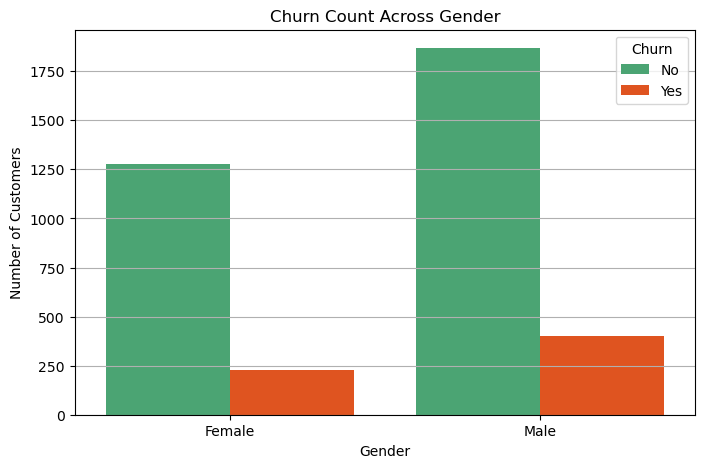

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Churn', palette={0: 'mediumseagreen', 1: 'orangered'})
plt.title('Churn Count Across Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.grid(True, axis='y')
plt.show()


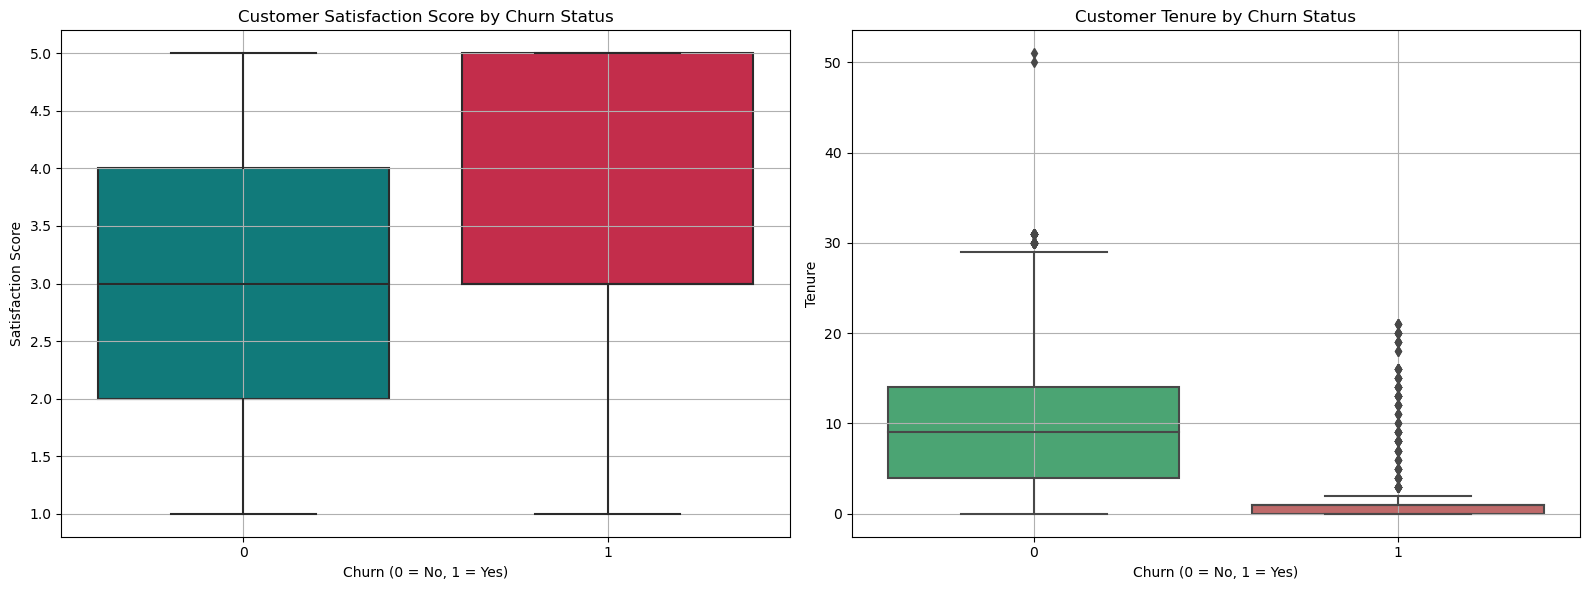

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Box plot for Satisfaction Score
sns.boxplot(data=df, x='Churn', y='SatisfactionScore', palette={0: 'darkcyan', 1: 'crimson'}, ax=axes[0])
axes[0].set_title('Customer Satisfaction Score by Churn Status')
axes[0].set_xlabel('Churn (0 = No, 1 = Yes)')
axes[0].set_ylabel('Satisfaction Score')
axes[0].grid(True)

# Box plot for Tenure
sns.boxplot(data=df, x='Churn', y='Tenure', palette={0: 'mediumseagreen', 1: 'indianred'}, ax=axes[1])
axes[1].set_title('Customer Tenure by Churn Status')
axes[1].set_xlabel('Churn (0 = No, 1 = Yes)')
axes[1].set_ylabel('Tenure')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


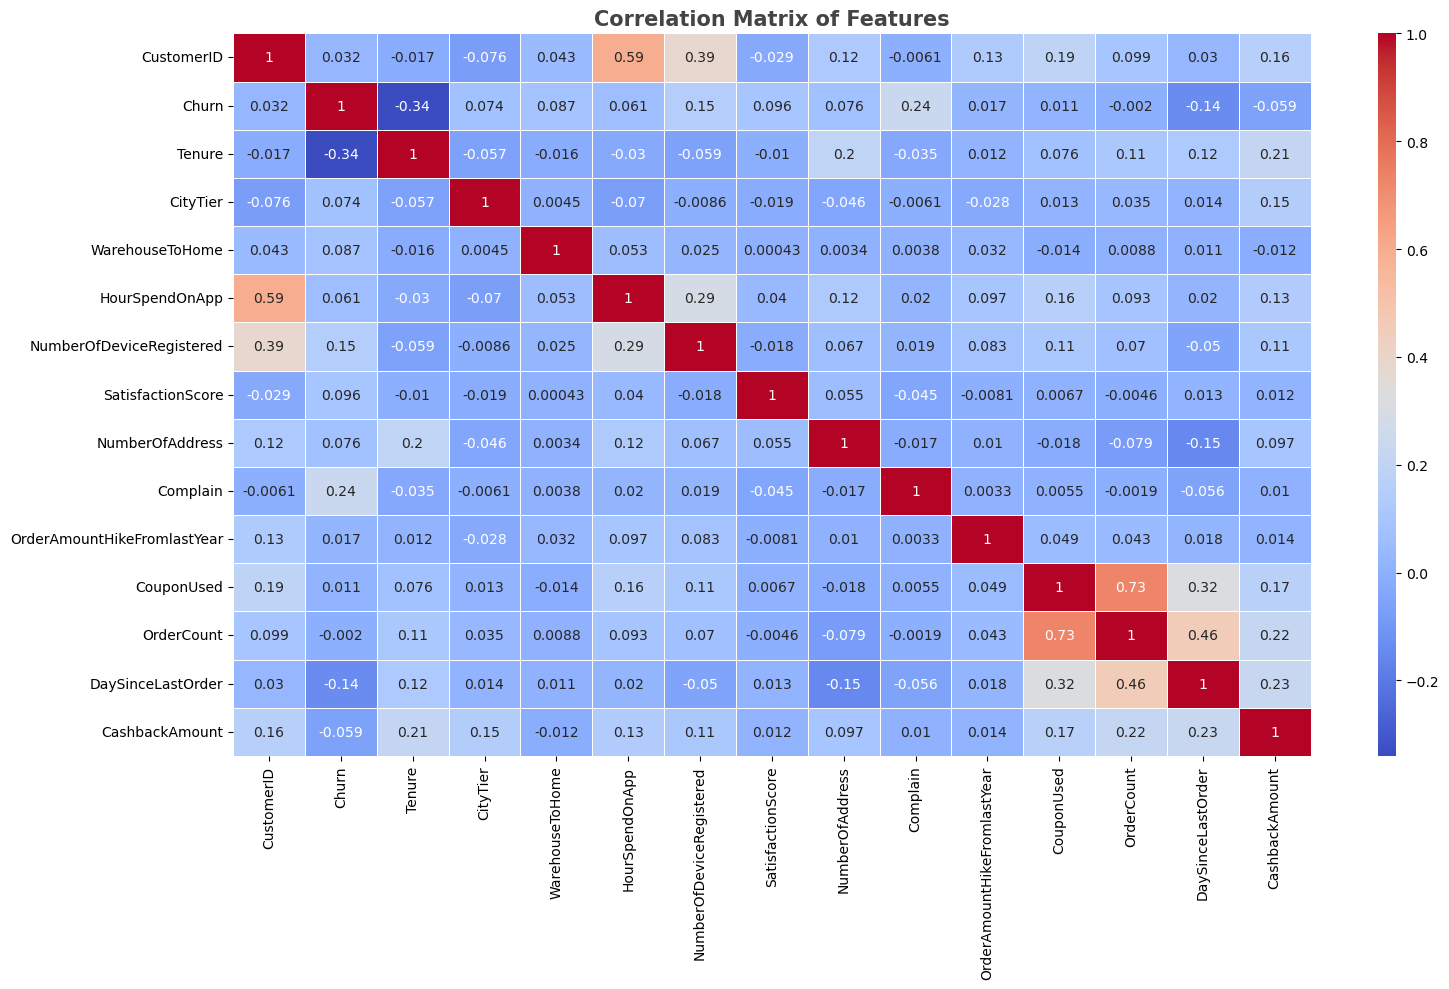

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a larger figure size for better visibility
plt.figure(figsize=(16, 10))

# Generate the heatmap with new configurations
heatmap = sns.heatmap(
    data=numeric_df.corr(),  
    annot=True,  
    cmap="coolwarm",  
    fmt=".2g",  
    linecolor="white",  
    linewidths=0.6, 
    cbar_kws={"aspect": 40}  
)

# Customize the plot title
heatmap.set_title("Correlation Matrix of Features", fontsize=15, weight='bold', color="#444")

# Improve spacing between the plot and title
plt.tight_layout()

# Display the updated heatmap
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Identify object (string) columns
obj_cols = df.select_dtypes(include='object').columns

# Apply label encoding to each object column
le = LabelEncoder()
for col in obj_cols:
    df[col] = le.fit_transform(df[col])

## Outlier detection (LOF)

In [13]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

def detect_extreme_outliers_lof(df):
    extreme_outlier_counts = {}
    
    for column in df.select_dtypes(include=[np.number]).columns:
        model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # LOF model with contamination factor
        preds = model.fit_predict(df[[column]])
        
        # Count extreme outliers (-1 means an outlier)
        extreme_outlier_counts[column] = np.sum(preds == -1)
    
    return extreme_outlier_counts

# Detect extreme outliers using LOF
extreme_outlier_counts = detect_extreme_outliers_lof(df)

print("\n✅ Checking Data Outliers (Local Outlier Factor Method)")

# Print results
print("\nExtreme outlier counts per column using Local Outlier Factor:")
for col, count in extreme_outlier_counts.items():
    print(f"{col}: {count} extreme outliers")

# Compute total number of outliers
total_outliers = sum(extreme_outlier_counts.values())

print(f"\nTotal number of extreme outliers detected: {total_outliers}")



✅ Checking Data Outliers (Local Outlier Factor Method)

Extreme outlier counts per column using Local Outlier Factor:
CustomerID: 38 extreme outliers
Churn: 0 extreme outliers
Tenure: 21 extreme outliers
PreferredLoginDevice: 0 extreme outliers
CityTier: 0 extreme outliers
WarehouseToHome: 7 extreme outliers
PreferredPaymentMode: 0 extreme outliers
Gender: 0 extreme outliers
HourSpendOnApp: 4 extreme outliers
NumberOfDeviceRegistered: 0 extreme outliers
PreferedOrderCat: 24 extreme outliers
SatisfactionScore: 0 extreme outliers
MaritalStatus: 0 extreme outliers
NumberOfAddress: 3 extreme outliers
Complain: 0 extreme outliers
OrderAmountHikeFromlastYear: 0 extreme outliers
CouponUsed: 23 extreme outliers
OrderCount: 31 extreme outliers
DaySinceLastOrder: 35 extreme outliers
CashbackAmount: 37 extreme outliers

Total number of extreme outliers detected: 223


In [14]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd

def remove_extreme_outliers_featurewise_lof(df, contamination=0.01):
    cleaned_df = df.copy()
    
    # Select only numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for column in numeric_cols:
        model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
        preds = model.fit_predict(cleaned_df[[column]])  # Fit on single column
        
        # Keep only normal instances (1 means inlier, -1 means outlier)
        cleaned_df = cleaned_df[preds == 1]
    
    return cleaned_df

# Remove extreme outliers feature-wise using LOF
cleaned_df = remove_extreme_outliers_featurewise_lof(df, contamination=0.01)

# Verify remaining extreme outliers using LOF
extreme_outlier_counts_after = detect_extreme_outliers_lof(cleaned_df)

# Compute total number of outliers after removal
total_outliers = sum(extreme_outlier_counts_after.values())

print(f"\nTotal number of extreme outliers after removal: {total_outliers}")

# Print results
print(f"\nTotal data points after outlier removal: {len(cleaned_df)}")
print("\nExtreme outlier counts per column after removal:")
for col, count in extreme_outlier_counts_after.items():
    print(f"{col}: {count} extreme outliers")


Total number of extreme outliers after removal: 118

Total data points after outlier removal: 3560

Extreme outlier counts per column after removal:
CustomerID: 36 extreme outliers
Churn: 0 extreme outliers
Tenure: 16 extreme outliers
PreferredLoginDevice: 0 extreme outliers
CityTier: 0 extreme outliers
WarehouseToHome: 0 extreme outliers
PreferredPaymentMode: 0 extreme outliers
Gender: 0 extreme outliers
HourSpendOnApp: 0 extreme outliers
NumberOfDeviceRegistered: 0 extreme outliers
PreferedOrderCat: 0 extreme outliers
SatisfactionScore: 0 extreme outliers
MaritalStatus: 0 extreme outliers
NumberOfAddress: 0 extreme outliers
Complain: 0 extreme outliers
OrderAmountHikeFromlastYear: 17 extreme outliers
CouponUsed: 0 extreme outliers
OrderCount: 14 extreme outliers
DaySinceLastOrder: 0 extreme outliers
CashbackAmount: 35 extreme outliers


## RFE (Recursive Feature Elimination)

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = cleaned_df.drop(columns=["Churn"])  
y = cleaned_df["Churn"] 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Apply RFE
rfe = RFE(log_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Tenure', 'CityTier', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderCount', 'DaySinceLastOrder'],
      dtype='object')


In [16]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import optuna
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Use only selected features
selected_features = ['Tenure', 'CityTier', 'Gender', 'NumberOfDeviceRegistered',
                     'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
                     'OrderCount', 'DaySinceLastOrder']

X = cleaned_df[selected_features]
y = cleaned_df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ---------------- Model Training using Hypermeters----------------

## 🔹Logistic Regression

We begin with Logistic Regression as our baseline model due to its simplicity and interpretability. It helps us understand the key drivers of churn. We'll use the selected top 10 features and train a logistic regression model. After fitting, we’ll evaluate its performance using accuracy, precision, recall, and F1 score.

In [19]:
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

log_model = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, cv=5)
log_model.fit(X_train_scaled, y_train)
print("Logistic Regression Best Params:", log_model.best_params_)
print(classification_report(y_test, log_model.predict(X_test_scaled)))

Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       592
           1       0.77      0.39      0.52       120

    accuracy                           0.88       712
   macro avg       0.83      0.68      0.72       712
weighted avg       0.87      0.88      0.86       712



##  🔹Random Forest

To improve on the decision tree, we implement a Random Forest, which builds multiple decision trees on bootstrapped data samples and averages their predictions. This helps reduce overfitting and enhances accuracy. After training, we'll evaluate its metrics and compare against previous models.

In [21]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_model.fit(X_train, y_train)
print("Random Forest Best Params:", rf_model.best_params_)
print(classification_report(y_test, rf_model.predict(X_test)))

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       592
           1       0.94      0.82      0.88       120

    accuracy                           0.96       712
   macro avg       0.95      0.90      0.93       712
weighted avg       0.96      0.96      0.96       712



## 🔹Support Vector Machine (SVM)

We now train a Support Vector Machine model. Before training, we scale the data to ensure the algorithm performs optimally in high-dimensional space. SVM is suitable for small to medium-sized datasets and works well with a clear margin of separation. We'll use a linear or RBF kernel and assess its classification power.

In [22]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_model = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5)
svm_model.fit(X_train_scaled, y_train)
print("SVM Best Params:", svm_model.best_params_)
print(classification_report(y_test, svm_model.predict(X_test_scaled)))

SVM Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       592
           1       0.84      0.62      0.72       120

    accuracy                           0.92       712
   macro avg       0.89      0.80      0.83       712
weighted avg       0.91      0.92      0.91       712



## 🔹Bagging and Boosting (Ensemble)

Bagging (Bootstrap Aggregating) trains multiple instances of a base estimator on random subsets of the data and aggregates the results (majority vote for classification).

Boosting trains models sequentially, each focusing more on errors made by the previous one. AdaBoost is a popular boosting technique for binary classification.

#### BaggingClassifier (with Decision Trees)

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Bagging with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

bagging_model.fit(X_train_scaled, y_train)
print("Bagging Model (with Decision Trees)")
print(classification_report(y_test, bagging_model.predict(X_test_scaled)))


Bagging Model (with Decision Trees)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       592
           1       0.94      0.75      0.83       120

    accuracy                           0.95       712
   macro avg       0.94      0.87      0.90       712
weighted avg       0.95      0.95      0.95       712



#### GradientBoostClassifier (Boosting)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model
boosting_model.fit(X_train_scaled, y_train)

# Evaluate the model
print("Boosting Model (Gradient Boosting)")
print(classification_report(y_test, boosting_model.predict(X_test_scaled)))


Boosting Model (Gradient Boosting)
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       592
           1       0.83      0.57      0.67       120

    accuracy                           0.91       712
   macro avg       0.87      0.77      0.81       712
weighted avg       0.90      0.91      0.90       712



### Model Performance Evaluation

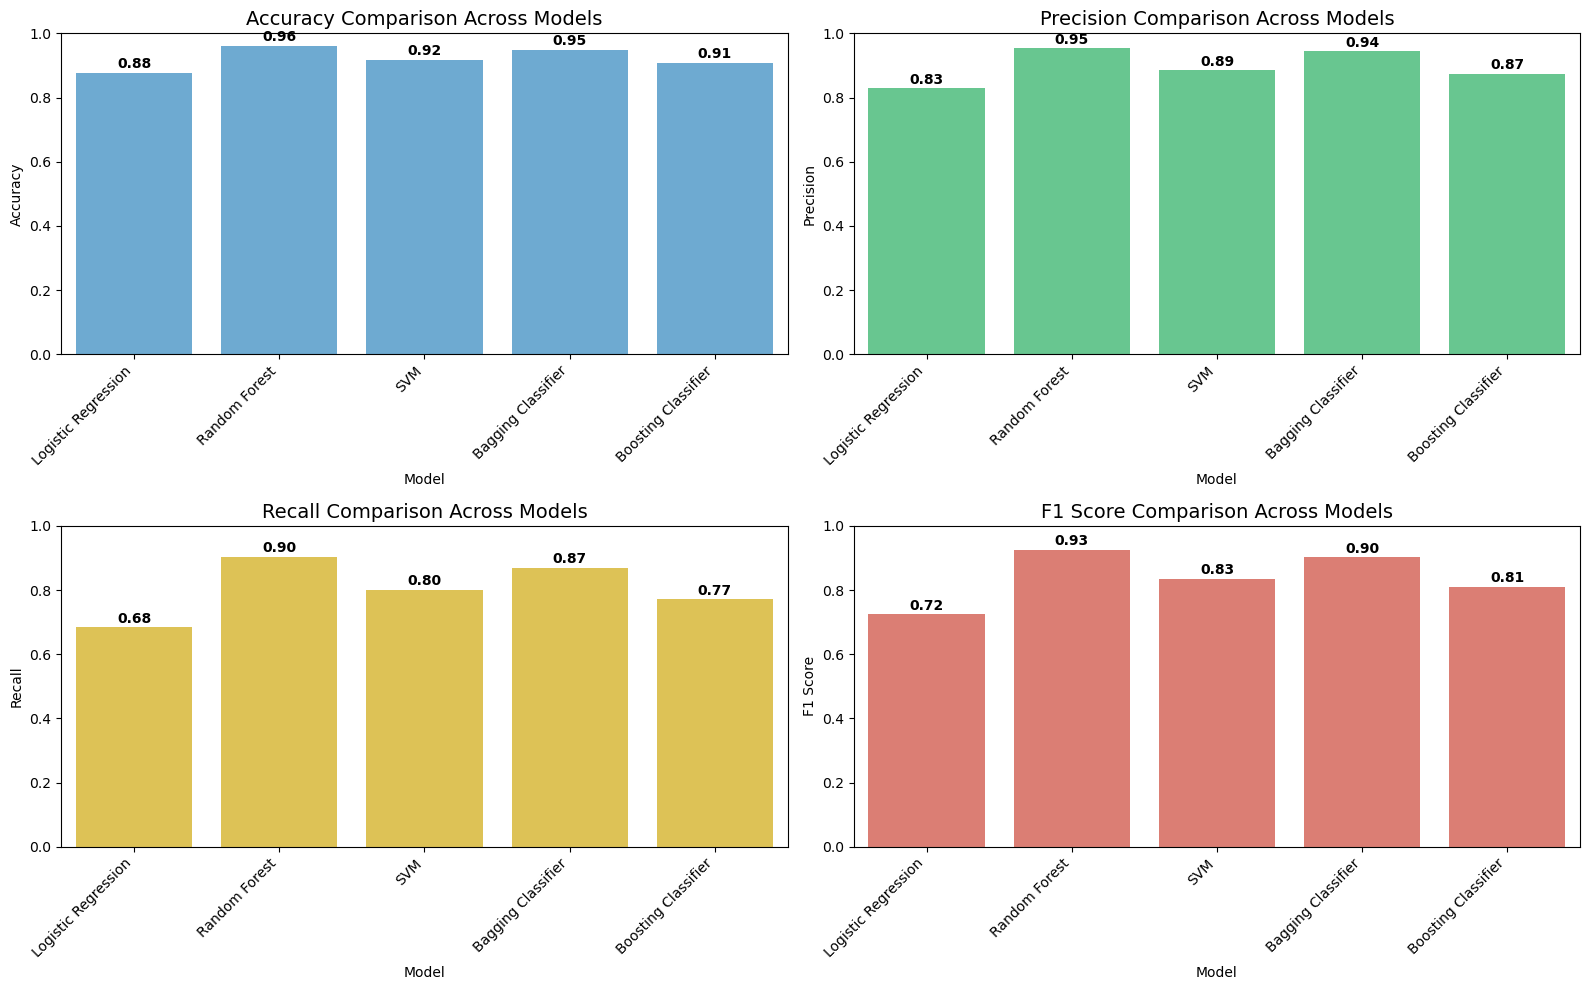

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define model names and corresponding trained models
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Bagging Classifier', 'Boosting Classifier']
models = [
    log_model.best_estimator_,
    rf_model.best_estimator_,
    svm_model.best_estimator_,
    bagging_model,
    boosting_model
]

# Define which models need scaled input
scaled_models = ['Logistic Regression',  'SVM', 'Bagging Classifier', 'Boosting Classifier']

# Initialize score dictionary
scores = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Compute scores
for name, model in zip(model_names, models):
    X_input = X_test_scaled if name in scaled_models else X_test
    y_pred = model.predict(X_input)

    scores['Model'].append(name)
    scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    scores['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    scores['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    scores['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))

# Create a DataFrame from the scores
score_df = pd.DataFrame(scores)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#5DADE2', '#58D68D', '#F4D03F', '#EC7063']

for ax, metric, color in zip(axes.flatten(), metrics, colors):
    sns.barplot(x='Model', y=metric, data=score_df, ax=ax, palette=[color]*len(score_df))
    for idx, val in enumerate(score_df[metric]):
        ax.text(idx, val + 0.005, f"{val:.2f}", ha='center', va='bottom', fontweight='bold')
    ax.set_title(f'{metric} Comparison Across Models', fontsize=14)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


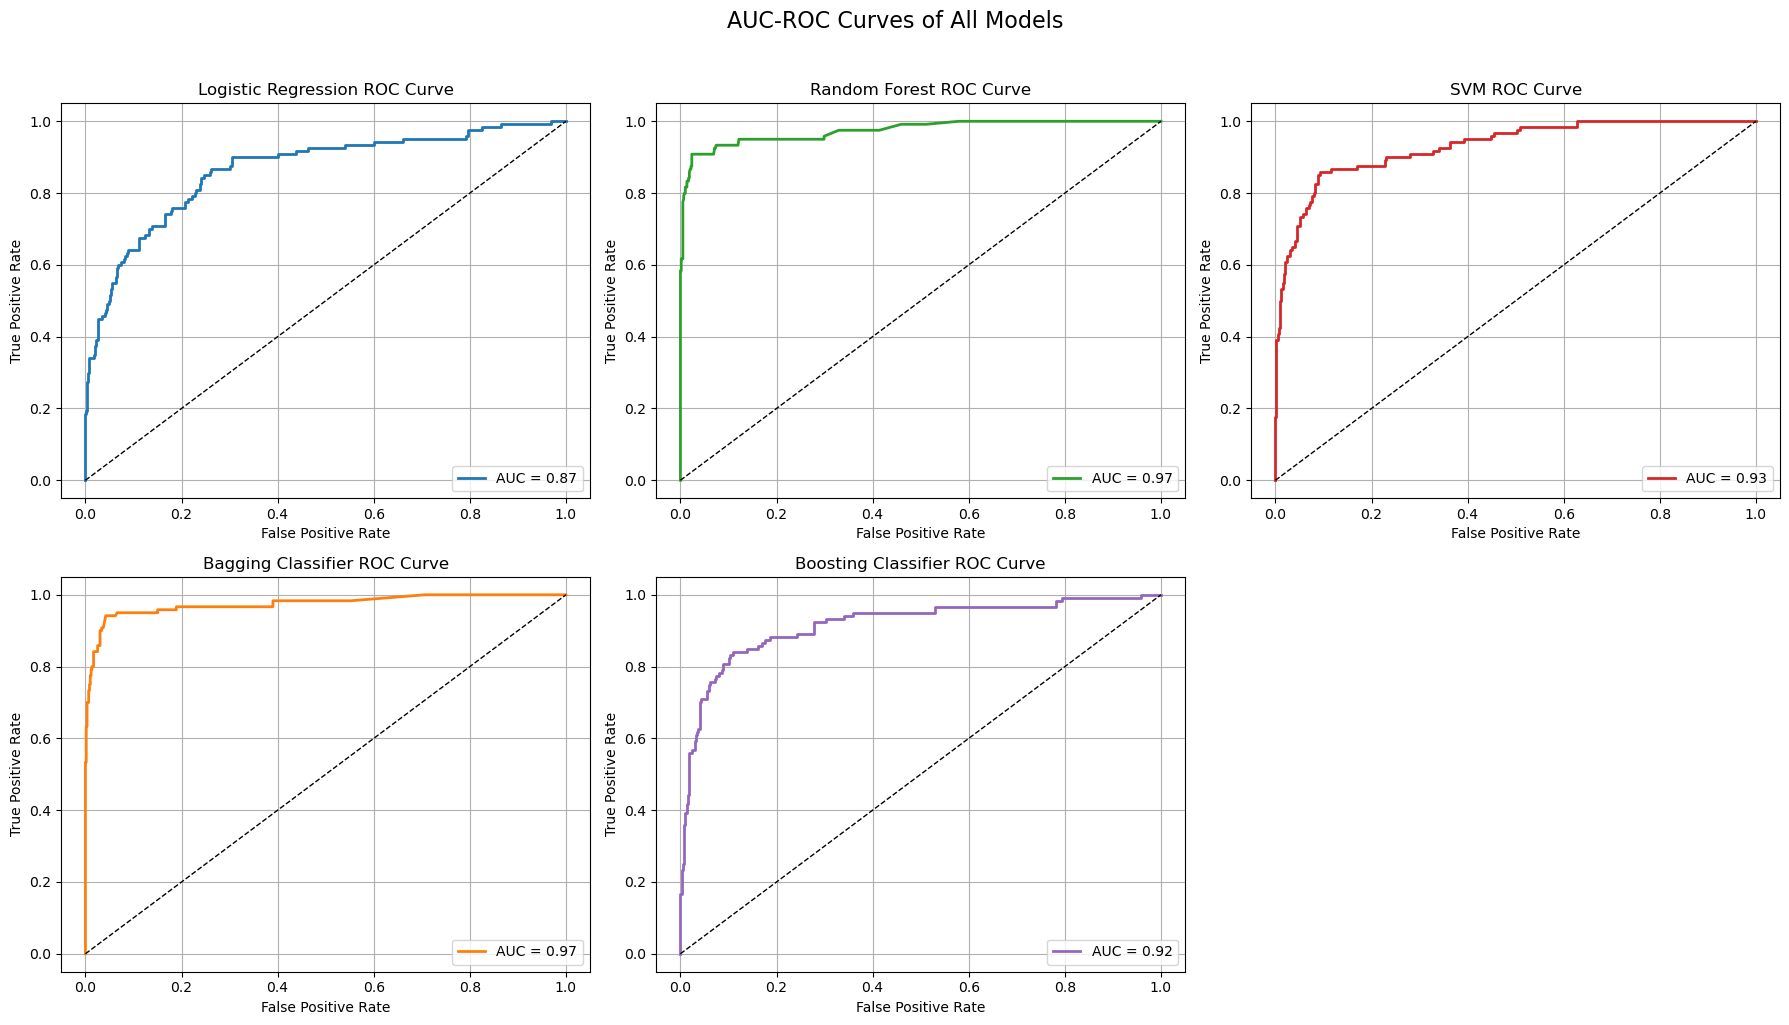

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the same models used in the bar plot
models = {
    "Logistic Regression": log_model.best_estimator_,
    "Random Forest": rf_model.best_estimator_,
    "SVM": svm_model.best_estimator_,
    "Bagging Classifier": bagging_model,
    "Boosting Classifier": boosting_model
}

# Models requiring scaled input
scaled_models = ["Logistic Regression", "SVM", "Bagging Classifier", "Boosting Classifier"]

# Define colors for each model
colors = {
    "Logistic Regression": "#1f77b4",
    "Random Forest": "#2ca02c",
    "SVM": "#d62728",
    "Bagging Classifier": "#ff7f0e",
    "Boosting Classifier": "#9467bd"
}

# Subplot setup
n_models = len(models)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curves
for idx, (name, model) in enumerate(models.items()):
    ax = axes[idx]
    color = colors[name]
    
    X_input = X_test_scaled if name in scaled_models else X_test

    # Some models may not support predict_proba (e.g., SVM with 'linear' kernel); fallback to decision_function
    try:
        y_prob = model.predict_proba(X_input)[:, 1]
    except AttributeError:
        y_prob = model.decision_function(X_input)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color=color, lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_title(f'{name} ROC Curve', fontsize=12)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

# Remove unused subplot if any
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('AUC-ROC Curves of All Models', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## SHAP (SHapley Additive exPlanations)

In [40]:
import shap
import numpy as np

# For tree models (use TreeExplainer), linear (LinearExplainer), others (KernelExplainer)
# Background data for KernelExplainer
background = shap.sample(X_test_scaled, 100) if X_test_scaled.shape[0] > 100 else X_test_scaled

# Ensure plotting works inside notebook
shap.initjs()

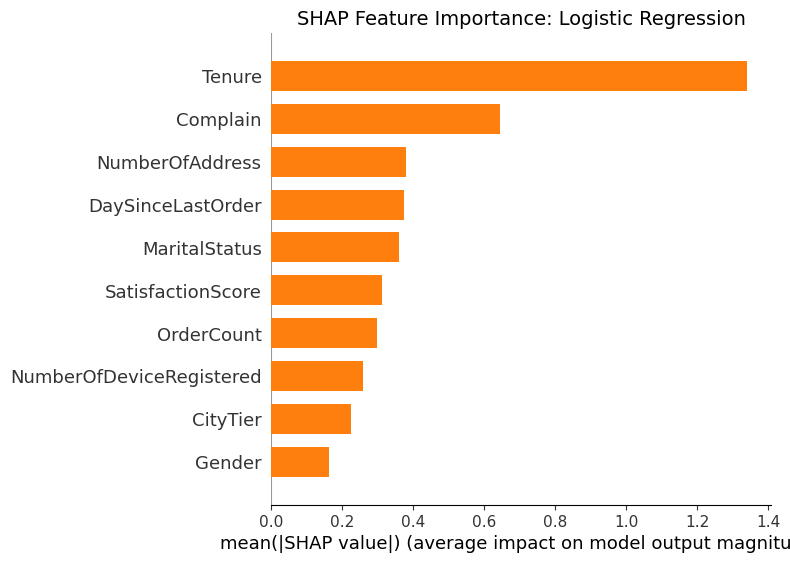

In [45]:
# --- Logistic Regression (Orange) ---
explainer_lr = shap.LinearExplainer(log_model.best_estimator_, X_test_scaled, feature_perturbation="interventional")
shap_values_lr = explainer_lr.shap_values(X_test_scaled)

plt.figure()
shap.summary_plot(
    shap_values_lr,
    X_test_scaled,
    feature_names=X_test.columns,
    plot_type="bar",
    show=False,
    color="#ff7f0e"  # Orange
)
plt.title("SHAP Feature Importance: Logistic Regression", fontsize=14)
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

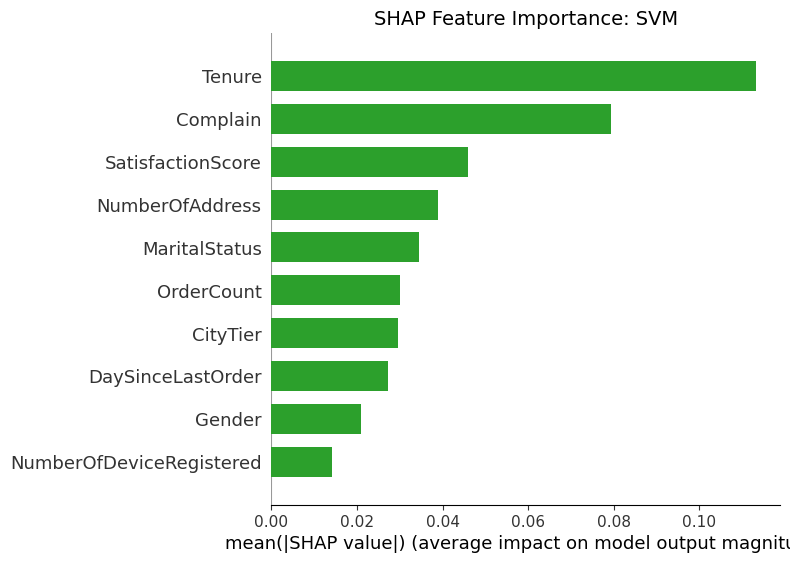

In [46]:
# --- SVM (Green) ---
explainer_svm = shap.KernelExplainer(svm_model.best_estimator_.predict, background)
shap_values_svm = explainer_svm.shap_values(X_test_scaled[:100])  # Limit due to slowness

plt.figure()
shap.summary_plot(
    shap_values_svm,
    X_test_scaled[:100],
    feature_names=X_test.columns,
    plot_type="bar",
    show=False,
    color="#2ca02c"  # Green
)
plt.title("SHAP Feature Importance: SVM", fontsize=14)
plt.show()


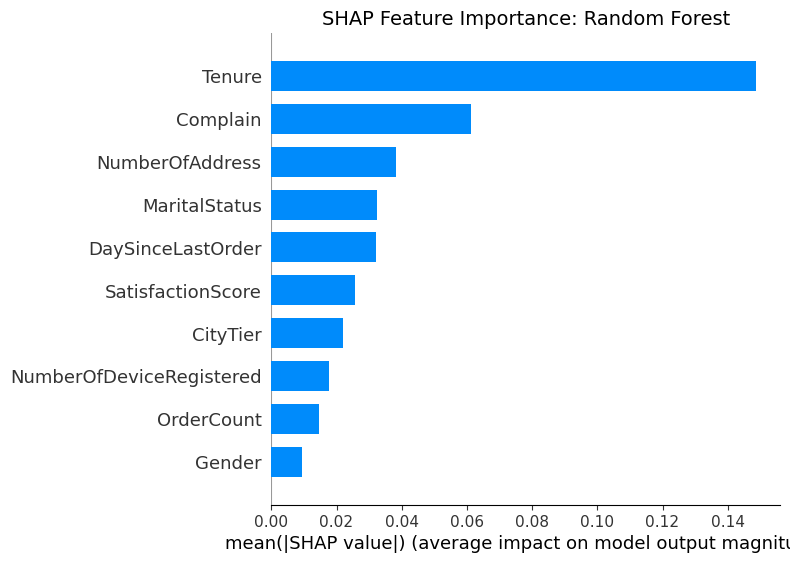

In [47]:
# --- Random Forest (Default Blue) ---
explainer_rf = shap.TreeExplainer(rf_model.best_estimator_)
shap_values_rf = explainer_rf.shap_values(X_test)

plt.figure()
shap.summary_plot(
    shap_values_rf[1],  # Assuming binary classification
    X_test,
    feature_names=X_test.columns,
    plot_type="bar",
    show=False
)
plt.title("SHAP Feature Importance: Random Forest", fontsize=14)
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

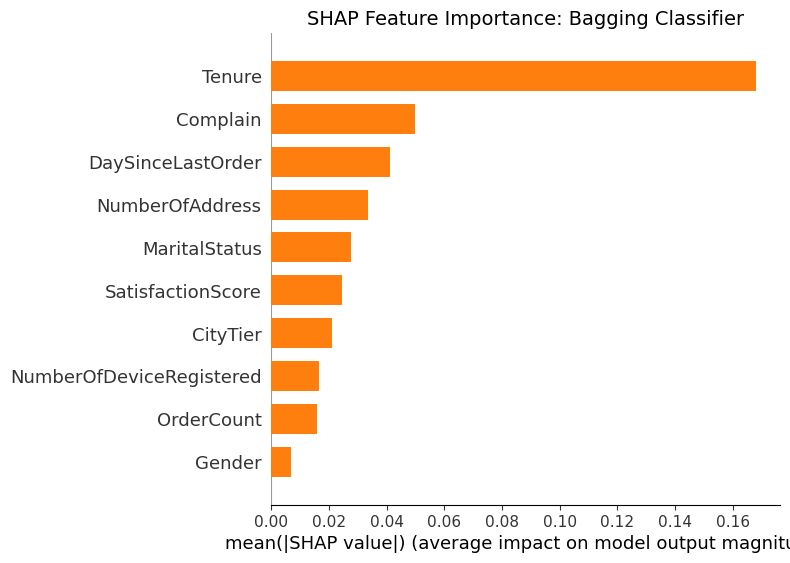

In [55]:
# Use KernelExplainer for BaggingClassifier (slow)
explainer_bag = shap.KernelExplainer(bagging_model.predict, background)
shap_values_bag = explainer_bag.shap_values(X_test_scaled[:100])

# Plot SHAP summary
shap.summary_plot(
    shap_values_bag,
    X_test_scaled[:100],
    feature_names=X_test.columns,
    plot_type="bar",
    show=False,
    color="#ff7f0e"  # e.g., orange
)
plt.title("SHAP Feature Importance: Bagging Classifier", fontsize=14)
plt.show()


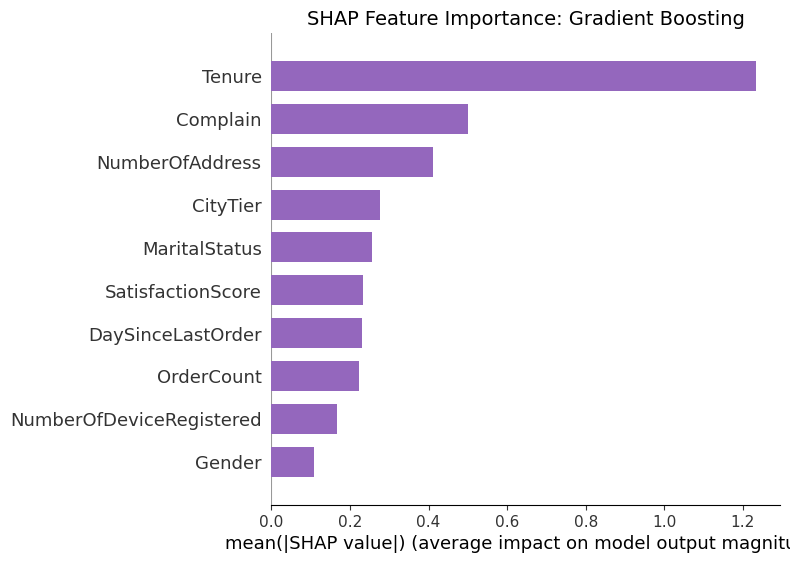

In [56]:
# TreeExplainer supports GradientBoostingClassifier
explainer_boost = shap.TreeExplainer(boosting_model)
shap_values_boost = explainer_boost.shap_values(X_test_scaled)

# If it's a list (binary classification), take class 1
if isinstance(shap_values_boost, list):
    shap_values_boost = shap_values_boost[1]

shap.summary_plot(
    shap_values_boost,
    X_test_scaled,
    feature_names=X_test.columns,
    plot_type="bar",
    show=False,
    color="#9467bd"  # Purple, for boosting
)
plt.title("SHAP Feature Importance: Gradient Boosting", fontsize=14)
plt.show()

## Confusion Matrix

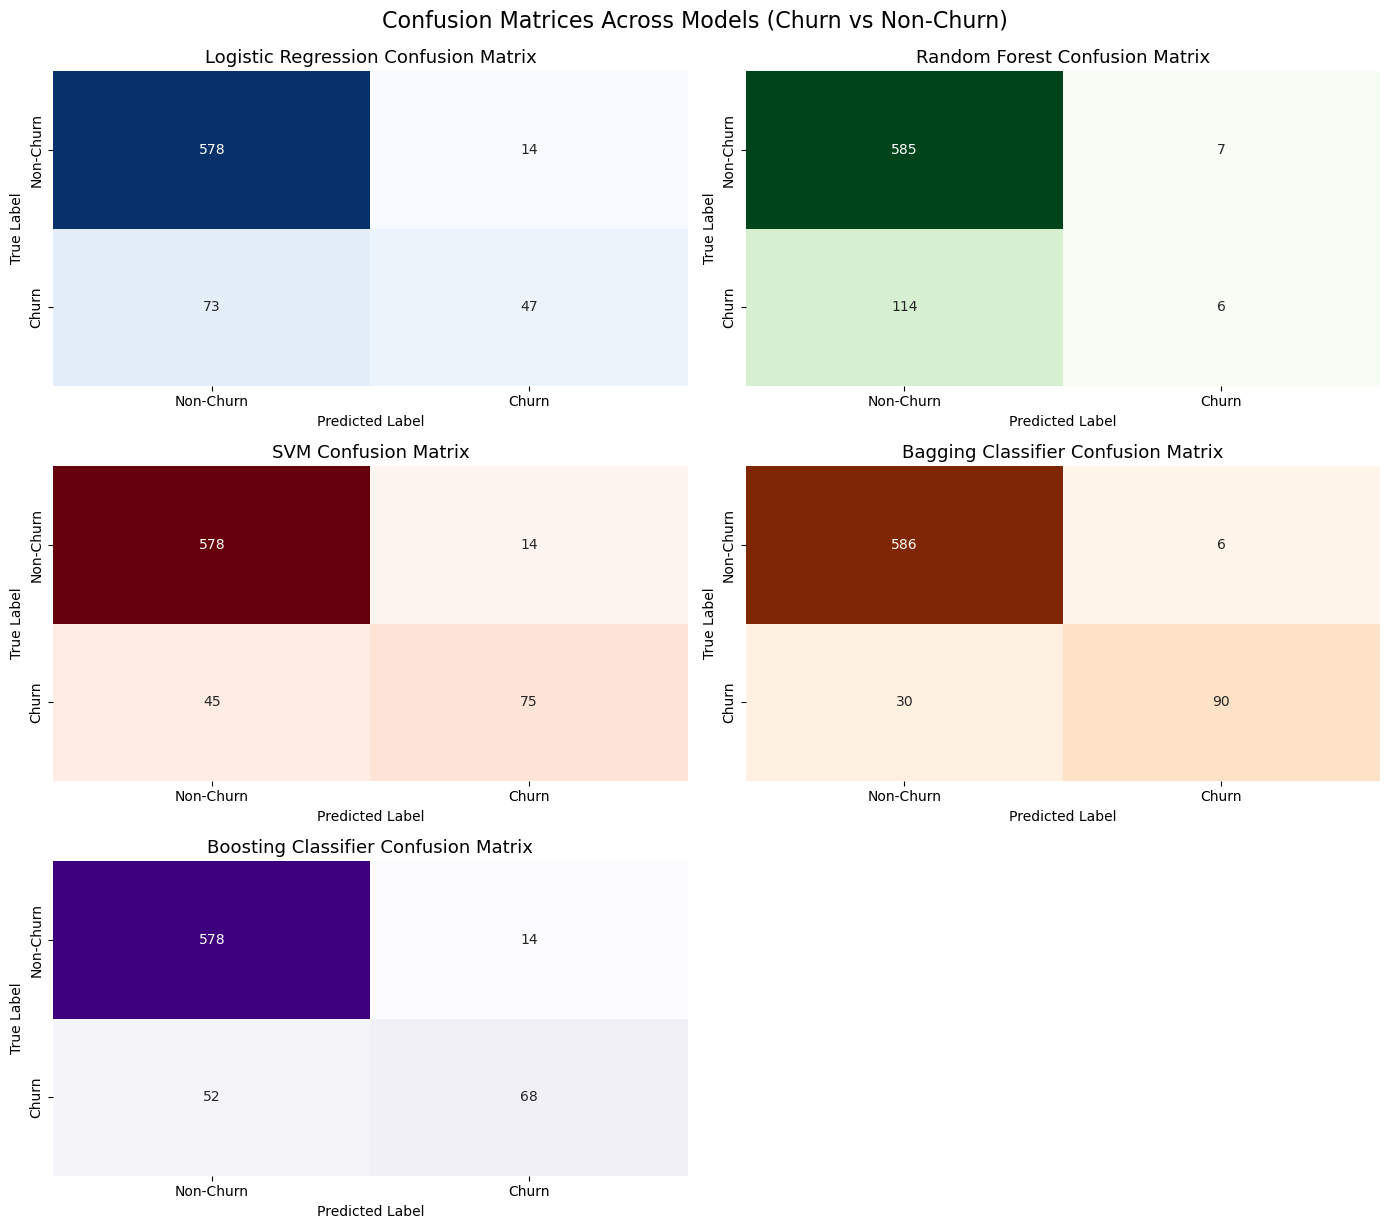

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define models and names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Bagging Classifier', 'Boosting Classifier']
models = [
    log_model.best_estimator_,
    rf_model.best_estimator_,
    svm_model.best_estimator_,
    bagging_model,
    boosting_model
]

# Color maps for each model
cmap_dict = {
    'Logistic Regression': 'Blues',
    'Random Forest': 'Greens',
    'SVM': 'Reds',
    'Bagging Classifier': 'Oranges',
    'Boosting Classifier': 'Purples'
}

# Class labels
labels = ['Non-Churn', 'Churn']

# Set up subplot grid
n_models = len(models)
cols = 2
rows = (n_models + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

# Plot each confusion matrix
for idx, (name, model) in enumerate(zip(model_names, models)):
    ax = axes[idx]

    # Predict
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=cmap_dict[name],
        xticklabels=labels,
        yticklabels=labels,
        ax=ax,
        cbar=False
    )
    ax.set_title(f'{name} Confusion Matrix', fontsize=13)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Remove unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Confusion Matrices Across Models (Churn vs Non-Churn)', fontsize=16, y=1.02)
plt.show()


## 🧩 DBSCAN Cluster Interpretation with t-SNE

Below is the behavioral profiling of each customer cluster based on attributes such as Tenure, Satisfaction, Complaints, and more.

| Cluster | Interpretation |
|---------|----------------|
| **-1** (Noise) | Outliers with **high tenure**, moderate satisfaction, and **highest number of addresses**. They show **some complaints** and average order count. These may be **nomadic or inconsistent users**. |
| **0** | Fairly new users (low tenure), with **high satisfaction** and **no complaints**. Likely **stable and happy customers**. |
| **1** | Similar to Cluster 0 but with slightly lower satisfaction and **some complaints**. Potentially **satisfied but not loyal**. |
| **2** | Very new customers with **highest satisfaction**, **zero complaints**, and **minimal engagement**. Likely **new happy customers**. |
| **3** | Users with **very long tenure**, high satisfaction, **highest order count**, and **no complaints**. Likely **most loyal and valuable customers**. |
| **4** | Very short-tenure users with moderate satisfaction and high address count. Possibly **frequent movers or early churn risk**. |
| **5** | Mid-tenure users with **no complaints**, high satisfaction, and medium order activity. Likely **quietly satisfied customers**. |
| **6** | Slightly new users with **many addresses and devices**, high satisfaction, and **no complaints**. Possibly **tech-savvy multi-device users**. |
| **7** | Short-tenure but **maximum satisfaction** and **highest complaints**. Could be **demanding or high-expectation customers**. |
| **8** | Very low tenure, perfect satisfaction, and **some complaints**. Might represent **new but critical customers**. |
| **9** | Short tenure, satisfied, moderate complaints, and average behavior. Possibly **average new users**. |
| **10** | Very new users with highest order count, perfect satisfaction, **zero complaints**. Potential **super new loyal customers**. |
| **11** | New, satisfied, and **moderate activity**. Stable but not distinctive. Possibly **potential loyalists**. |

---

### 📝 Notes:
- **Tenure:** Customer longevity
- **SatisfactionScore:** 1 (low) to 5 (high)
- **Complain:** 0 (no complaints) to 1 (many complaints)
- **Cluster -1:** DBSCAN uses -1 to mark outliers (noise)

> 🧠 Use these profiles to tailor retention, upsell, or churn-prevention strategies!


In [61]:
# Add cluster labels to your original dataset
X_clustered = X.copy()
X_clustered['Cluster'] = dbscan_labels

# Add churn if available
X_clustered['Churn'] = y.values  # if y is your churn column

# Summarize each cluster
cluster_summary = X_clustered.groupby('Cluster').mean()
cluster_summary


,Tenure,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,Churn
Cluster,,,,,,,,,,,
-1,8.604238,1.719931,0.595934,3.753436,3.042669,1.184422,4.254868,0.287514,2.667239,4.365693,0.168385
0,3.800000,1.000000,1.000000,3.000000,4.000000,1.000000,2.000000,0.000000,1.000000,7.800000,0.000000
1,4.400000,3.000000,1.000000,3.000000,3.000000,1.000000,1.600000,0.000000,1.000000,2.000000,0.000000
2,1.400000,1.000000,1.000000,3.000000,5.000000,1.000000,1.400000,0.000000,1.000000,2.000000,0.000000
3,15.333333,1.000000,0.000000,4.000000,3.000000,1.000000,4.000000,0.000000,2.000000,3.000000,0.000000
4,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,3.333333,0.000000,2.000000,1.000000,1.000000
5,5.285714,3.000000,1.000000,4.000000,3.000000,1.000000,2.428571,0.000000,2.000000,3.000000,0.000000
6,2.285714,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000,0.000000,2.000000,1.285714,0.428571
7,2.000000,1.000000,1.000000,4.000000,5.000000,2.000000,4.333333,0.000000,2.000000,3.333333,0.333333


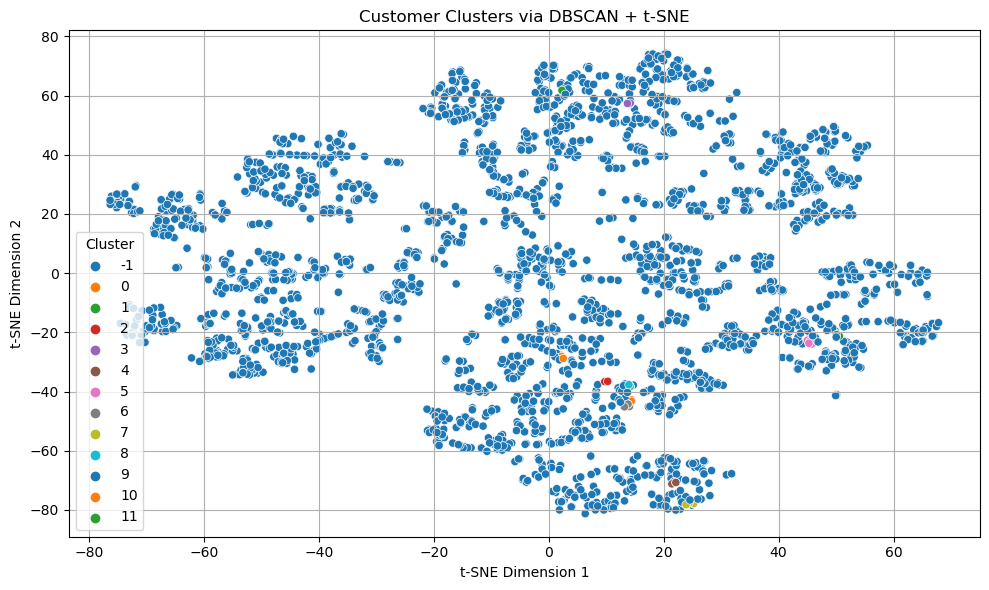

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scale features for DBSCAN & t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. DBSCAN Clustering (tune eps & min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. t-SNE for 2D projection
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=dbscan_labels,
    palette='tab10',
    legend='full'
)
plt.title('Customer Clusters via DBSCAN + t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
import joblib

# Export models
joblib.dump(log_model.best_estimator_, 'logistic_regression_model.pkl')
joblib.dump(svm_model.best_estimator_, 'svm_model.pkl')
joblib.dump(rf_model.best_estimator_, 'random_forest_model.pkl')
joblib.dump(bagging_model, 'bagging_model.pkl')
joblib.dump(boosting_model, 'boosting_model.pkl')  # if you used GradientBoostingClassifier

print("✅ All models exported as .pkl files.")

✅ All models exported as .pkl files.
